In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', titlesize=14, labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import numpy as np
np.random.seed(42)

# Linear Regression

In [11]:
m = 100
X = 2 * np.random.rand(m, 1)
Y = 4 + 3 * X + np.random.randn(m, 1)

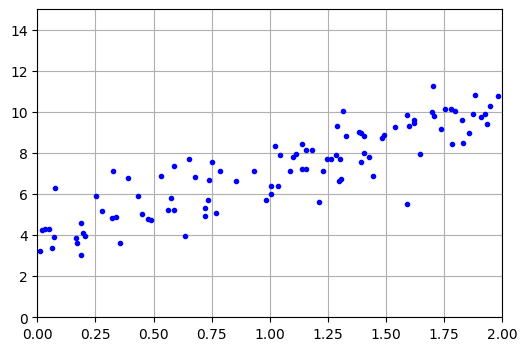

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(X, Y, "b.") # b. = blue dot
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

## Manual

In [15]:
X_b = np.c_[np.ones((m, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
theta_best

array([[3.92335662],
       [3.14149032]])

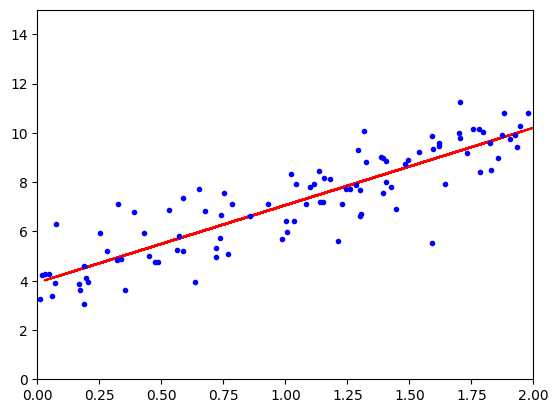

In [16]:
X_p = 2 * np.random.rand(m, 1)
Y_p = theta_best[0] + theta_best[1] * X_p

plt.plot(X_p, Y_p, "r-")
plt.plot(X, Y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## Scikit-Learn

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

In [20]:
lin_reg.intercept_, lin_reg.coef_

(array([3.92335662]), array([[3.14149032]]))

# Polynomial Regression

In [21]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # y = 0.5x^2 + x + 2 + noise

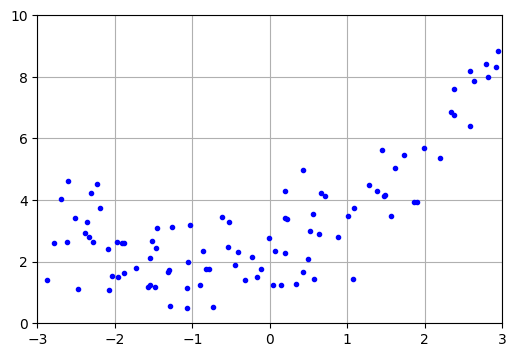

In [23]:
plt.figure(figsize=(6, 4))
plt.plot(X, Y, "b.")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly

array([[ 7.09528629e-01,  5.03430876e-01],
       [-7.86518163e-01,  6.18610820e-01],
       [-2.24791703e-01,  5.05313098e-02],
       [ 1.48482563e+00,  2.20470715e+00],
       [-2.77990078e+00,  7.72784836e+00],
       [-1.48537833e+00,  2.20634879e+00],
       [ 1.28009752e+00,  1.63864965e+00],
       [ 2.37124103e+00,  5.62278400e+00],
       [ 7.00646527e-02,  4.90905556e-03],
       [ 1.92680912e-01,  3.71259337e-02],
       [-2.35696793e+00,  5.55529783e+00],
       [-3.15525799e-01,  9.95565299e-02],
       [ 1.95703599e-01,  3.82998986e-02],
       [-1.54517698e+00,  2.38757189e+00],
       [-1.38454061e+00,  1.91695271e+00],
       [-7.36295021e-01,  5.42130358e-01],
       [-2.87957281e+00,  8.29193959e+00],
       [-1.06752501e+00,  1.13960964e+00],
       [-1.73131196e+00,  2.99744110e+00],
       [-1.03501589e+00,  1.07125789e+00],
       [-2.28142721e+00,  5.20491011e+00],
       [ 2.34316368e+00,  5.49041605e+00],
       [ 5.61554721e-01,  3.15343705e-01],
       [ 1.

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)

lin_reg.intercept_, lin_reg.coef_

(array([2.16335407]), array([[0.8878975 , 0.45341944]]))

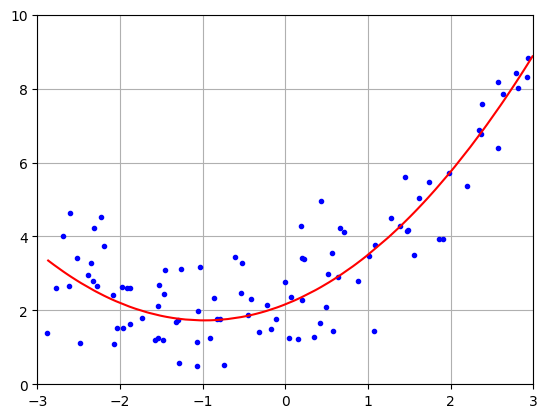

In [46]:
X_p = 6 * np.random.rand(m, 1) - 3
X_p.sort(axis=0)
Y_p = lin_reg.coef_[0][1] * X_p**2 + lin_reg.coef_[0][0] * X_p + lin_reg.intercept_[0]

plt.plot(X, Y, "b.")
plt.plot(X_p, Y_p, "r-")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()